# Problem: Predicting residential utility costs based on attributes of the house. 

## Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/cleaned.csv", index_col=0)
df[df.select_dtypes(["object"]).columns] = df.select_dtypes(["object"]).apply(
    lambda x: x.astype("category")
)

In [3]:
X = df.drop(columns='total_usage')
y = df['total_usage']

### StandardScaler, OneHotEncoder

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [5]:
numeric_features = df.select_dtypes(exclude=["category"]).columns
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features)]
)
df.loc[:, numeric_features] = preprocessor.fit_transform(df)

In [6]:
categorical_features = df.select_dtypes(include=["category"]).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dummy_na=False)

In [7]:
X = df.drop(columns='total_usage')
y = df['total_usage']

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Specify the hyperparameter space
# parameters = {"elasticnet__l1_ratio": np.linspace(0, 1, 30)}
parameters = {"kernel": ("linear", "rbf"), "C": [1, 10]}

# model = ElasticNet()
model = svm.SVR()

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs = 8)

# Fit to the training set
gm_cv.fit(X, y)

sorted(clf.cv_results_.keys())

# Compute and print the metrics
# r2 = gm_cv.score(X_test, y_test)
# print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
# print("Tuned ElasticNet R squared: {}".format(r2))

In [3]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import r2_score

import lightgbm as lgb

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

plt.style.use("seaborn")
sns.set(font_scale=1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
lgb_params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "rmse",
    #'max_depth': 8,
    "num_leaves": 20,
    "bagging_fraction": 0.2,
    "feature_fraction": 0.2,
    "learning_rate": 0.001,
    "verbose": 1,
    "lambda_l2": 2,
}

In [18]:
trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test)


evals_result = {}

lgb_clf = None
lgb_clf = lgb.train(
    lgb_params,
    trn_data,
    100000,
    valid_sets=[trn_data, val_data],
    early_stopping_rounds=3000,
    verbose_eval=2000,
    evals_result=evals_result,
)

Training until validation scores don't improve for 3000 rounds.
[2000]	training's rmse: 0.575902	valid_1's rmse: 0.622145
[4000]	training's rmse: 0.476935	valid_1's rmse: 0.572886
[6000]	training's rmse: 0.429056	valid_1's rmse: 0.555376
[8000]	training's rmse: 0.395435	valid_1's rmse: 0.546496
[10000]	training's rmse: 0.369012	valid_1's rmse: 0.541906
[12000]	training's rmse: 0.347201	valid_1's rmse: 0.538846
[14000]	training's rmse: 0.328588	valid_1's rmse: 0.536575
[16000]	training's rmse: 0.312481	valid_1's rmse: 0.535074
[18000]	training's rmse: 0.298073	valid_1's rmse: 0.533935
[20000]	training's rmse: 0.285017	valid_1's rmse: 0.532959
[22000]	training's rmse: 0.273088	valid_1's rmse: 0.532233
[24000]	training's rmse: 0.26212	valid_1's rmse: 0.531625
[26000]	training's rmse: 0.2517	valid_1's rmse: 0.53109
[28000]	training's rmse: 0.241972	valid_1's rmse: 0.530679
[30000]	training's rmse: 0.232751	valid_1's rmse: 0.530192
[32000]	training's rmse: 0.224089	valid_1's rmse: 0.529826


In [19]:
y_pred = lgb_clf.predict(X_test)

In [20]:
r2_score(y_test, y_pred)

0.7014101848595615

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
explained_variance_score(y_test, y_pred)

0.7025989235499164

In [22]:
mean_absolute_error(y_test, y_pred)

0.3615643339929879

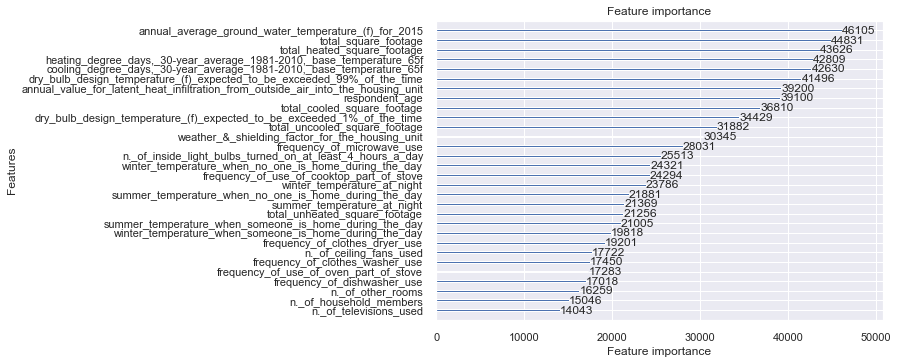

In [23]:
lgb.plot_importance(lgb_clf, max_num_features = 30)
plt.show()

In [66]:
ELECTRICITY_TO_BTU = 3412.152
GAS_TO_BTU = 
PROPAN_TO_BTU = 91.33
OIL_TO_BTU = 135

Y_BTU = (
    Y_electicity * ELECTRICITY_TO_BTU
    + Y_gas * GAS_TO_BTU
    + Y_propan * PROPAN_TO_BTU
    + Y_oil * OIL_TO_BTU
)


In [9]:
trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test)


evals_result = {}

lgb_clf = None
lgb_clf = lgb.train(
    lgb_params,
    trn_data,
    100000,
    valid_sets=[trn_data, val_data],
    early_stopping_rounds=3000,
    verbose_eval=2000,
    evals_result=evals_result,
)

Training until validation scores don't improve for 3000 rounds.
[2000]	training's rmse: 26167.8	valid_1's rmse: 32048.6
[4000]	training's rmse: 21755.6	valid_1's rmse: 28682.4
[6000]	training's rmse: 19561.3	valid_1's rmse: 27623.1
[8000]	training's rmse: 18010.5	valid_1's rmse: 27090.3
[10000]	training's rmse: 16782	valid_1's rmse: 26799.5
[12000]	training's rmse: 15757	valid_1's rmse: 26658.3
[14000]	training's rmse: 14890.5	valid_1's rmse: 26573.6
[16000]	training's rmse: 14131.4	valid_1's rmse: 26521.4
[18000]	training's rmse: 13452.9	valid_1's rmse: 26482.4
[20000]	training's rmse: 12833.3	valid_1's rmse: 26455.3
[22000]	training's rmse: 12260.4	valid_1's rmse: 26423.8
[24000]	training's rmse: 11726.5	valid_1's rmse: 26401.1
[26000]	training's rmse: 11223.2	valid_1's rmse: 26386.6
[28000]	training's rmse: 10751.7	valid_1's rmse: 26382.3
[30000]	training's rmse: 10305.6	valid_1's rmse: 26377.9
[32000]	training's rmse: 9888.11	valid_1's rmse: 26370.5
[34000]	training's rmse: 9493.44

In [11]:
r2_score(y_test, y_pred)

0.7263837422971875